In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})

In [2]:
data = pd.read_csv('Netology_A_B-testing_HW_1.csv')

In [3]:
data

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
0,0,2020-05-21,867689,12,1,1,1,no surge,1,0,20,iOS,0,business,7.982135,low
1,1,2020-05-23,752172,5,1,1,1,no surge,1,0,37,Android,1,economy,2.908468,high
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low
3,3,2020-05-19,304024,0,1,1,1,no surge,1,0,59,Android,1,economy,1.874349,low
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101495,101495,2020-05-24,288445,16,1,1,1,no surge,1,0,29,Android,0,comfort,1.725907,high
101496,101496,2020-05-19,627754,2,1,1,1,surge,1,0,23,iOS,1,comfort,6.206134,medium
101497,101497,2020-05-23,784442,1,1,1,1,no surge,1,0,40,iOS,0,economy,6.624225,medium
101498,101498,2020-05-20,232993,13,1,1,1,no surge,1,0,52,iOS,0,business,8.825188,low


# Количество отмененных и совершенных поездок в разрезе времени

In [284]:
df=data[data.order_made==1]
df=df.groupby('hour')['Unnamed: 0'].count().reset_index()

In [287]:
print("Медиана количества заказов за период 7 дней:", df['Unnamed: 0'].median())
print("Среднее количество заказов за период 7 дней::",df['Unnamed: 0'].mean())
print("95 процентиль количества заказов за период 7 дней::",df['Unnamed: 0'].quantile(.95))

Медиана количества заказов за период 7 дней: 3209.5
Среднее количество заказов за период 7 дней:: 3093.1666666666665
95 процентиль количества заказов за период 7 дней:: 3322.2


<AxesSubplot:xlabel='hour', ylabel='count'>

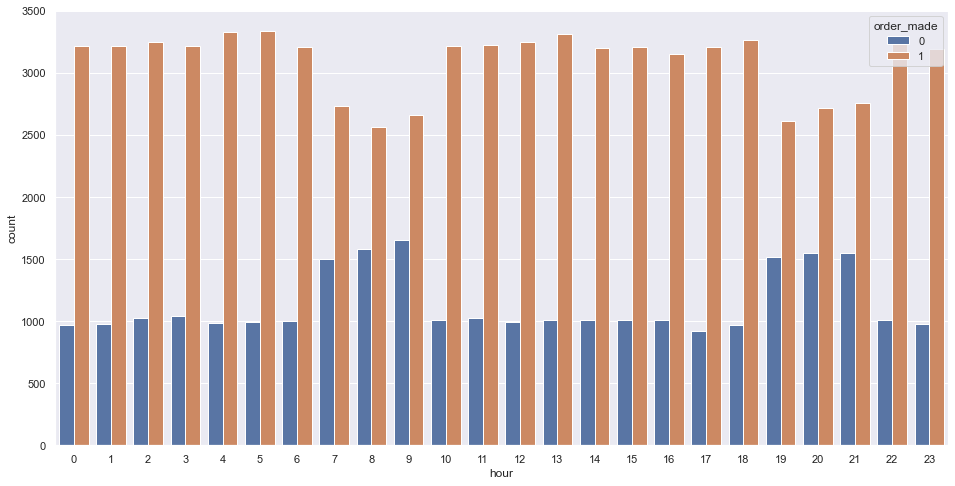

In [270]:
sns.countplot(x='hour', hue='order_made',data=data)

<AxesSubplot:xlabel='hour', ylabel='order_made'>

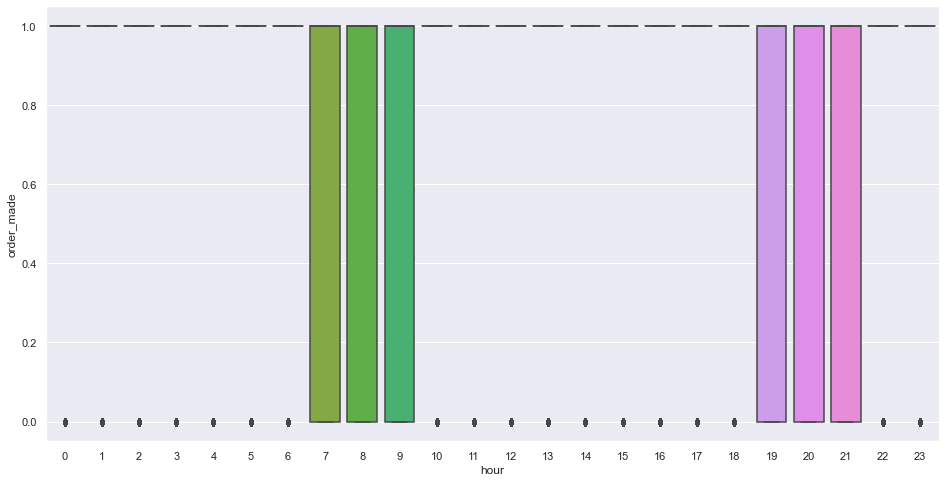

In [273]:
sns.boxplot( x=data["hour"], y=data["order_made"] )

<AxesSubplot:xlabel='hour', ylabel='count'>

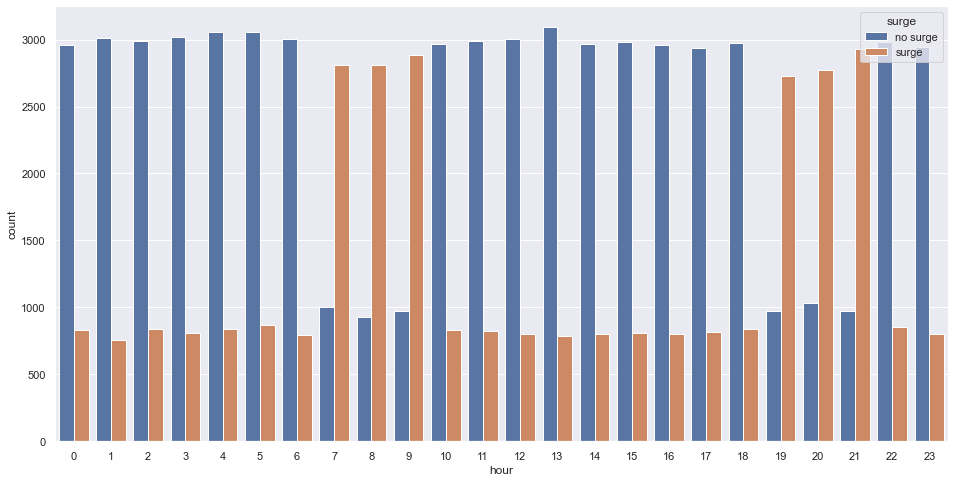

In [278]:
sns.countplot(x='hour', hue='surge',data=data)

Вывод: В период с 7 до 9 утра и с 19 до 21 вечера наблюдается повышенное число несовершенных заказов и пониженное количество совершенных заказов. В это же время наблюдается повышенный спрос. Пользователи отказываются от поездок из-за высокой стоимости.

#  Конверсия в разрезе разных групп лояльности

In [266]:
df1 = data.loc[data.app_opened == 1,['date','order_made','rfm']]
df2 = data.loc[data.order_made == 1,['date','order_made','rfm']]

df1 = df.groupby(['date','rfm']).count().reset_index()
df2 = df2.groupby(['date','rfm'])['order_made'].count().reset_index()
df3= pd.merge(df1, df2, on=['date','rfm'])
df3['conversion'] = df3.order_made_y/df3.order_made_x

In [288]:
print("Медиана конверсии за 7 дней:", df3['conversion'].median())
print("Среднее конверсии за 7 дней:",df3['conversion'].mean())
print("95 процентиль конверсии за 7 дней:",df3['conversion'].quantile(.95))

Медиана конверсии за 7 дней: 0.8087514145605432
Среднее конверсии за 7 дней: 0.8100149206203056
95 процентиль конверсии за 7 дней: 0.8240052831434703


<AxesSubplot:xlabel='date', ylabel='conversion'>

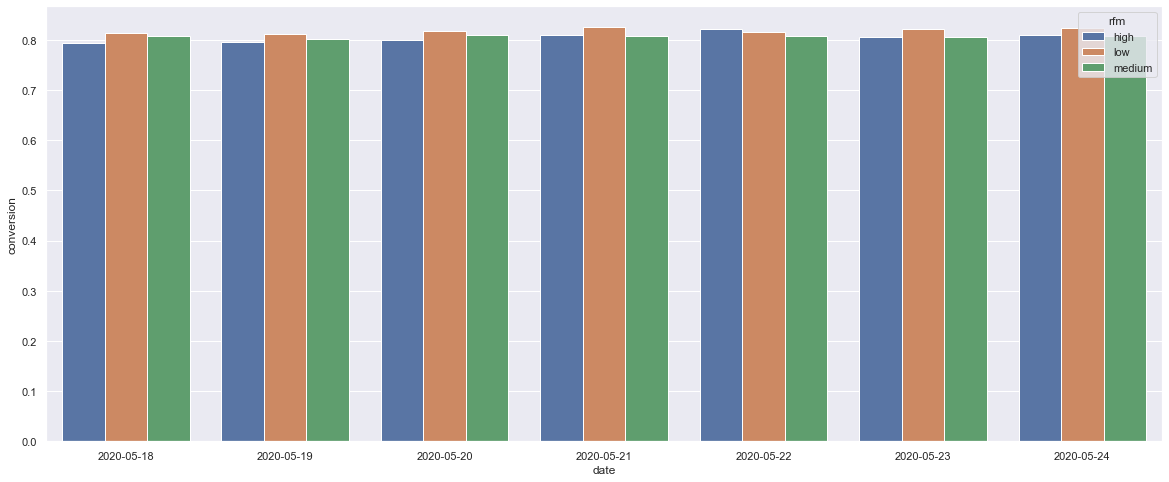

In [268]:
sns.barplot(x=df3['date'],y=df3['conversion'],hue=df3['rfm'])

<AxesSubplot:xlabel='rfm', ylabel='conversion'>

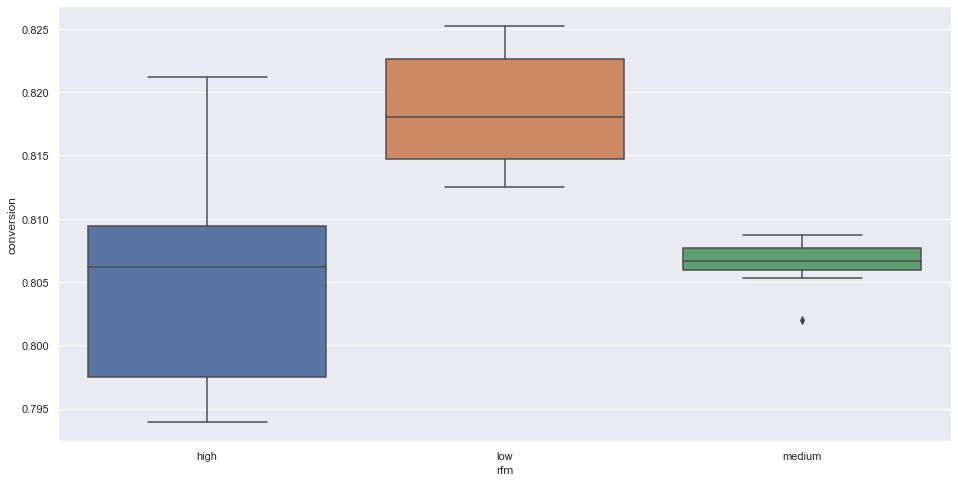

In [269]:
sns.set(rc={'figure.figsize':(16,8)})
sns.boxplot( x=df3["rfm"], y=df3["conversion"] )

Вывод: В целом конверсия за 7 дней у разных групп лояльности почти одинаковая. Зависимости не выявлено (разве что у high уровня она чуть ниже). 

# Продолжительности дистанции в разрезе класса машин

In [293]:
df = data[data.order_made==1]
df1 = df.groupby(['date','order_class'])['distance'].sum().reset_index()
df2 = df.groupby(['date','order_class'])['distance'].count().reset_index()

df3= pd.merge(df1, df2, on=['date','order_class'])

df3['dist']= df3.distance_x/df3.distance_y # считаем дистанцию на 1 пользователя в данном классе

In [300]:
print("Медиана дистанции:", df3.groupby('order_class')['dist'].median())
print("Среднее дистанции:",df3.groupby('order_class')['dist'].mean())
print("95 процентиль дистанции:",df3.groupby('order_class')['dist'].quantile(.95))

Медиана дистанции: order_class
business    12.077201
comfort      5.023327
economy      3.990464
Name: dist, dtype: float64
Среднее дистанции: order_class
business    12.068794
comfort      5.027905
economy      3.991630
Name: dist, dtype: float64
95 процентиль дистанции: order_class
business    12.174283
comfort      5.061287
economy      4.054785
Name: dist, dtype: float64


<AxesSubplot:xlabel='date', ylabel='dist'>

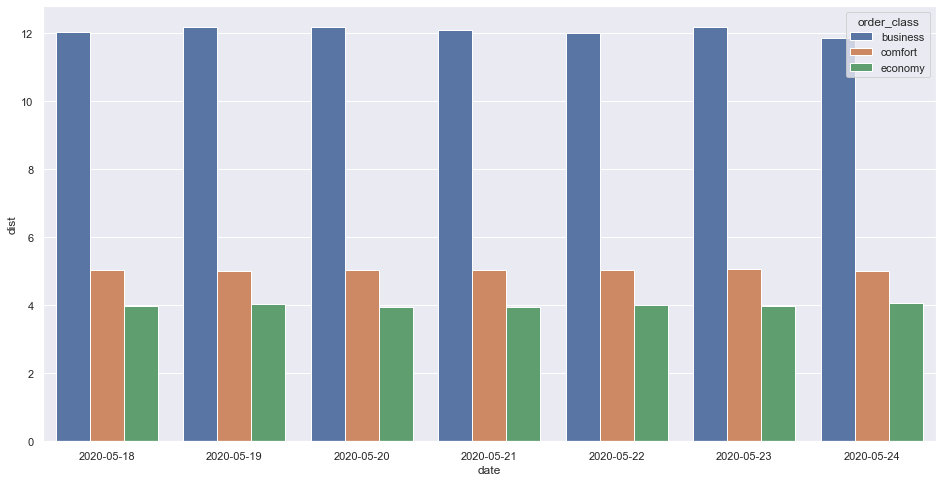

In [303]:
sns.barplot(x=df3['date'],y=df3['dist'] ,hue=df3['order_class'])

<AxesSubplot:xlabel='order_class', ylabel='distance'>

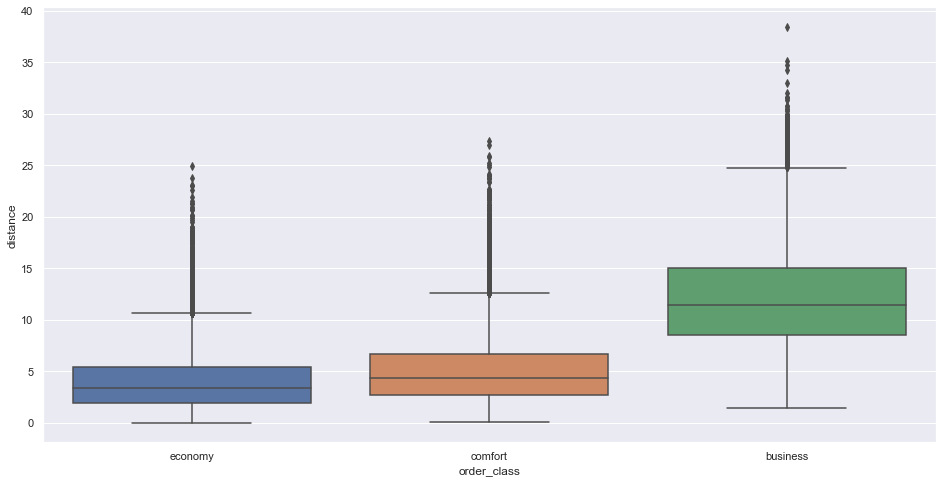

In [307]:
sns.boxplot( x=data.loc[data.order_made==1,'order_class'],y=data.loc[data.order_made==1,'distance'] )

Вывод: Пользователи, выбирающие бизнесс-класс, совершают более длительные поездки. Нельзя утверждать, что если пользователь выбирает долгую поездку, то он обязательно закажет бизнес-класс, так как нужно учитывать платежеспособность клиентов (выбросы в классах эконом и комфорт подверждают, что это не всегда так)